# Objektno programiranje, simbolno računanje

## Objektno programiranje

Pri programiranju poznamo različne pristope, dokumentacija Python-a ([docs.python.org](https://docs.python.org/howto/functional.html)) omenja npr:

1. **proceduralni**: seznam navodil, kaj je treba izvesti (npr.: ``C, Pascal``)
1. **deklerativni**: opišemo kaj želimo, programski jezik pa izvede (npr., ``SQL``)
1. **funkcijski**: programiranje temelji na funkcijah (npr.: ``Haskell`` )
1. **objektni**: program temelji na objektih, ki imajo lastnosti, funkcije ... (npr.: ``Java, Smalltalk``)


Python je objektno orientiran programski jezik, vendar pa nas ne sili v uporabo objektov v vseh primerih. Kot bomo videli pozneje, ima objektno programiranje veliko prednosti, vendar pa je lahko mnogokrat okorno in bi po nepotrebnem naredilo program kompleksen. Iz tega razloga se eksplicitnemu objektnemu programiranju izognemo, če se le da.

Objektno programiranje v Pythonu temelji na **razredih** (*class*), objekti so pa **instance** (*instance*) razreda.  Pogledali si bomo zgolj nekatere osnove objektnega programiranja (da boste lažje razumeli kodo drugih avtorjev in jo prirejali svojim potrebam).

Razred definiramo z ukazom `class` ([dokumentacija](https://docs.python.org/tutorial/classes.html)):
```python
class ImeRazreda:
    '''docstring'''
    [izraz 1]
    [izraz 2]
    .
    .
```
kjer ime razreda (torej `ImeRazreda`) po PEP8 pišemo z veliko začetnico. Če je ime sestavljeno iz več besed, vsako pišemo z veliko (t. i. principi *CamelCase*).

Poglejmo si primer:

In [1]:
class Pravokotnik:
    """Razred za objekt pravokotnik"""

    def __init__(self, širina=1, višina=1): # to je konstruktor objekta. Se izvede, ko kličemo Pravokotnik(sirina=1, visina=4)
        self.širina = širina 
        self.višina = višina # višina je atribut objekta
        
    def površina(self):
        return self.širina * self.višina
    
    def set_širina(self, širina=1):
        self.širina = širina

Preden gremo v podrobnosti razumevanja kode, naredimo instanco razreda (torej objekt):

In [2]:
moj_pravokotnik = Pravokotnik()

Funkcije definirane znotraj razreda poimenujemo **metode**, ko jih kličemo na objektih. 

V zgornjem primeru metodo `površina` uporabimo tako:

In [3]:
moj_pravokotnik.površina()

1

Ime ``self`` je referenca na instanco razreda (objekt, ki bo ustvarjen). Imena znotraj razreda postanejo **atributi** objekta.

Primer atributa `višina˙:

In [4]:
moj_pravokotnik.višina

1

Od kje pride rezultat `1`? Ko ustvarimo objekt, se najprej izvede inicializacijska funkcija `__init__()`, pri tem se kot argumenti funkcije `__init__` uporabijo argumenti, ki jih posredujemo v razred.

Primer:

In [5]:
tvoj_pravokotnik = Pravokotnik(višina=5, širina=3)
tvoj_pravokotnik.površina()

15

Pripravili smo tudi metodo, ki spremeni atribut `širina`:

In [6]:
moj_pravokotnik.set_širina(širina=100)
moj_pravokotnik.površina()

100

Atribute lahko spreminjamo tudi neposredno, vendar se temu (zaradi možnosti napake in napačne uporabe) ponavadi izogibamo.

Primer:

In [7]:
moj_pravokotnik.višina = 3
moj_pravokotnik.površina()

300

### Dedovanje

Pomembna lastnost razredov je dedovanje; samo ime pove bistvo: tako kot ljudje dedujemo od svojih staršev, podobno velja tudi za razrede.  Vsak razred (`class`) tako lahko deduje lastnosti kakega drugega razreda ([dokumentacija](https://docs.python.org/tutorial/classes.html#inheritance)). Lahko ima celo več staršev (v te podrobnosti tukaj ne bomo šli).

Sintaksa razreda, ki deduje, je:
```python
class Otrok(Starš):
    [izraz]
    .
    .
```

Opomba: tudi, če razredu ne definiramo *starša*, deduje razred `class`.

Primer, ko novi razred `Kvadrat` podeduje obstoječega (`Pravokotnik`):

In [8]:
class Kvadrat(Pravokotnik):
    "Razred kvadrat"
    
    def __init__(self, širina=1):
        # kličimo iniciacijo razreda Pravokotnik
        super().__init__(širina=širina, višina=širina)
        
    def set_širina(self, širina):
        self.širina = širina
        self.višina = širina

Poglejmo sedaj uporabo:

In [9]:
moj_kvadrat = Kvadrat(širina=4)

Razred `Kvadrat` nima definicije metode za izračun površine, vendar pa jo je podedoval od razreda `Pravokotnik` in zato *ima metodo* za izračun površine:

In [10]:
moj_kvadrat.površina()

16

V kolikor spremenimo širino, se ustrezno spremeni površina:

In [11]:
moj_kvadrat.set_širina(5)
moj_kvadrat.površina()

25

#### Primer dedovanja razreda `list` (seznam)

Najprej pripravimo seznam:

In [12]:
seznam = list([1,2,3])
seznam

[1, 2, 3]

Če želimo seznamu dodati vrednost, uporabimo metodo `append` (to je metoda, ki jo imajo objekti tipa `list`):

In [13]:
seznam.append(1)

Nato seznam prikažemo (najprej uvozimo `matplotlib`):

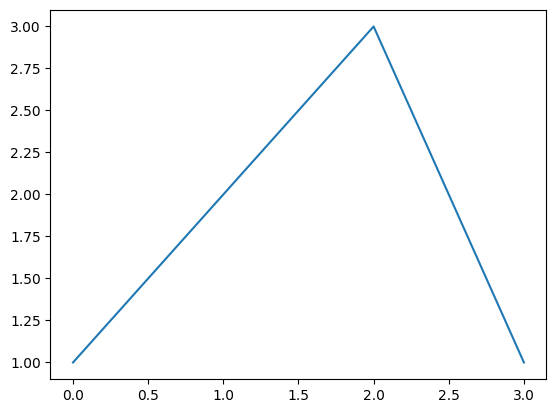

In [14]:
import matplotlib.pyplot as plt
plt.plot(seznam)
plt.show()

Če nekaj takega izvajamo pogosto, potem je bolje, da si pripravimo svoj razred `Seznam`, ki deduje od `list` in dodamo metodo za prikaz `nariši`:

In [15]:
class Seznam(list):
        
    def nariši(self):
        plt.plot(self, 'r.', label='Dolgo besedilo')
        plt.legend()
        plt.ylim(-5, 5)
        plt.show()

Instanca objekta je:

In [16]:
moj_seznam = Seznam([1, 2, 3])
type(moj_seznam)

__main__.Seznam

In [17]:
moj_seznam

[1, 2, 3]

Čeprav nismo definirali metode `append`, jo je nov razred podedoval po razredu `list`: 

In [18]:
moj_seznam.append(1)
moj_seznam

[1, 2, 3, 1]

Ima tudi metodo za izris:

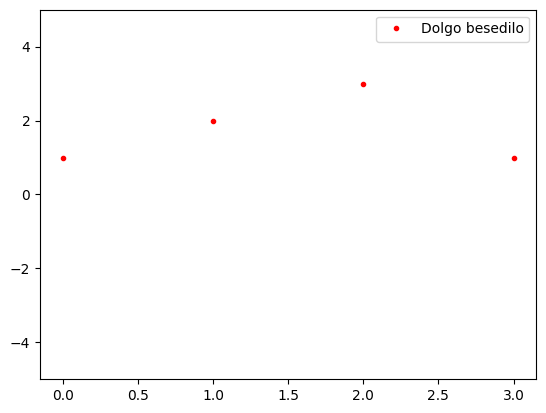

In [19]:
moj_seznam.nariši()

## Simbolno računanje s ``SymPy``

Termin **simbolno računanje** pomeni, da matematične izraze rešujemo strojno v obliki abstraktnih simbolov (in **ne numerično**). Strojno simbolno računanje nam pomaga kadar nas zanima **rezultat v simbolni obliki** in so izrazi preobsežni za klasično reševanje na list in papir. K strojnemu reševanju se zatečemo tudi zaradi zmanjšanja možnosti napake (pri obsežnih izračunih se ljudje lahko zmotimo).

**Simbolno računanje nikakor ni nadomestek numeričnih metod!**

Pogledali si bomo nekatere osnove, nekateri priporočeni dodatni viri pa so:

* J.R. Johansson [Scientific python lectures](http://github.com/jrjohansson/scientific-python-lectures),
* [SymPy](http://sympy.org/en/index.html) - uradna dokumentacija modula,
* Odličen članek nekaterih avtorjev SymPy: [Meurer et. al, 2017](https://peerj.com/articles/cs-103/).

``SymPy`` je eden od sistemov za strojno algebro (CAS - *Computer Algebra Systems*), ki pa ima poleg zmogljivosti tudi to prednost, da je v celoti napisan v Pythonu (alternativni paket v Pythonu [Sage](http://www.sagemath.org/) na primer ni v celoti napisan v Pythonu).

Nekatera namenska komercialna orodja:

* [Mathematica](http://www.wolfram.com/mathematica) 
* [Maple](http://www.maplesoft.com/products/maple) 

Najprej uvozimo modul ``SymPy``; tipično paket uvozimo kot `sym`:

In [20]:
import sympy as sym

Opazimo lahko, da se `SymPy` uvaža tudi `from sympy import *`. Temu se praviloma izogibamo, saj tako s `SymPy` imeni po nepotrebnem zapolnimo osnovni imenski prostor programa. V slednjem primeru do funkcij paketa (npr. `sympy.Sum`) dostopamo neposredno (npr. `Sum`), kar je lahko privlačno, vendar nas začne motiti, ko dodamo še druge pakete (npr. `numpy`), kar lahko poleg zmede privede do tega, da se funkcije z enakimi imeni "povozijo".

Zato da dobimo lepo oblikovan LaTeX izpis, uporabimo:

In [21]:
sym.init_printing()

### Definiranje spremenljivk in numerični izračun

Spremenljivke definiramo takole:

In [22]:
x, y, k = sym.symbols('x, y, k')

Preverimo lahko tip:

In [23]:
type(x)

sympy.core.symbol.Symbol

Opazimo, da je spremenljivka `x` sedaj `Symbol` iz paketa `sympy`.

Sedaj lahko naredimo preprost izračun:

In [24]:
x**y + k

Funkcijo lahko tudi poimenujemo; tukaj je primer, kjer uporabimo funkcijo sinus in konstanto $\pi$:

In [25]:
f = sym.sin(1.2*sym.pi + x)**2
f

Bralec se morebiti sprašuje, zakaj potrebujemo *novo* funkcijo `sympy.sin()`, saj imamo vendar že tisto iz paketa `numpy`! Razlog je v tem, da simbolni izračun potrebuje popolnoma drugačno obravnavo kakor numerični in zato je koda zadaj povsem drugačna.

Če želimo zapisati enačbo, torej da enačimo en izraz z drugim, to naredimo takole:

In [26]:
enačba = sym.Eq(sym.sin(k*x),0.5)
enačba

Nedefinirane matematične funkcije zapišemo kot ([dokumentacija](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.Function)): 

In [27]:
g = sym.Function('g')

Sedaj lahko, na primer, definiramo differencialno enačbo:

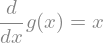

In [28]:
sym.Eq(g(x).diff(x), x)

Pri definiranju spremenljivk lahko dodajamo predpostavke:

In [29]:
x = sym.Symbol('x', positive=True)

In [30]:
x.is_positive

True

Predpostavke se potem upoštevajo pri izračunu. V splošnem vemo, da $\sqrt{(x^2)}\ne x$, če pa je $x$ pozitiven, pa velja $\sqrt{(x^2)}= x$ in `sympy` glede na predpostavke izračuna pravilen rezultat:

In [31]:
sym.sqrt(x**2)

Z metodo `assumptions0` pogledamo predpostavke objekta:

In [32]:
x.assumptions0

{'positive': True,
 'nonzero': True,
 'extended_positive': True,
 'finite': True,
 'imaginary': False,
 'nonpositive': False,
 'extended_negative': False,
 'complex': True,
 'extended_nonnegative': True,
 'hermitian': True,
 'negative': False,
 'extended_nonpositive': False,
 'extended_real': True,
 'zero': False,
 'commutative': True,
 'extended_nonzero': True,
 'nonnegative': True,
 'real': True,
 'infinite': False}

``SymPy`` pozna tipe števil ([dokumentacija](http://docs.sympy.org/latest/modules/core.html#module-sympy.core.numbers)): 

* ``Real`` realna števila, 
* ``Rational`` racionalna števila, 
* ``Complex`` kompleksna števila, 
* ``Integer`` cela števila.

Ti tipi so pomembni, saj lahko vplivajo na način reševanja in na rešitev.

#### Racionalna števila

Zgoraj smo že definirali *realna števila*. Poglejmo na primeru sedaj *racionalna števila*:

In [33]:
r1 = sym.Rational(4, 5)
r2 = sym.Rational(5, 4)

In [34]:
r1

Nekateri izračuni:

In [35]:
r1+r2

In [36]:
r1/r2

#### Kompleksna števila

Imaginarno število se zapiše z ``I`` (to je drugače kot pri `numpy`, kjer je imaginarni del definiran z `j`): 

In [37]:
1+1*sym.I

In [38]:
sym.I**2

#### Numerični izračun

Pri simbolnem izračunu najprej analitične izraze rešimo, poenostavimo itd., nato pa pogosto želimo tudi izračunati konkreten rezultat.

Poglejmo primer:

In [39]:
x = sym.symbols('x')
f = sym.exp(x**x**x + sym.pi)
f

Če želimo sedaj namesto $x$ uporabiti vrednost, npr `0.5`, to naredimo z metodo `subs()` ([dokumentacija](http://docs.sympy.org/latest/tutorial/basic_operations.html#substitution)):

In [40]:
f.subs(x, 0.5)

Zgoraj smo uporabili konstanto $\pi$ ([dokumentacija](http://docs.sympy.org/latest/modules/core.html?highlight=pi#sympy.core.numbers.Pi)); nekatere tipično uporabljene konstante so:

* ``sympy.pi`` za število $\pi$,
* ``sympy.E`` za naravno število $e$,
* ``sympy.oo`` za neskončnost.

Kot smo videli zgoraj, `subs()` naredi zamenjavo in potem poenostavitve, ki so očitne; števila $\pi$ ni izračunal v racionalni obliki. To moramo eksplicitno zahtevati z metodo:

* ``evalf`` (angl. *evaluate function, [dokumentacija](http://docs.sympy.org/latest/modules/evalf.html)) ali 
* ``N``,

kateri imata obe argument ``n`` (število števk).

Poglejmo primer:

In [41]:
f.subs(x, 2).evalf(n=80)

Podobno je z ``N``:

In [42]:
sym.N(f.subs(x, 2), n=80)

Mimogrede smo pokazali, da pod pogojem, da v izrazu nimamo števil s plavajočo vejico, lahko rezultat prikažemo poljubno natančno ([dokumentacija](http://docs.sympy.org/latest/modules/evalf.html)).

V ``subs`` funkciji lahko uporabimo tudi slovar. Primer:

In [43]:
x, y = sym.symbols('x, y')
parametri = {x: 4, y: 10}

In [44]:
(x + y).subs(parametri)

ali seznam terk:

In [45]:
(x + y).subs([(x, 4), (y, 10)])

Podobno ima metoda `sympy.evalf()` argument `subs`, ki sprejme slovar zamenjav, primer:

In [46]:
(y**x).evalf(subs=parametri)

Metoda ``sympy.subs`` pa lahko zamenja simbol (ali izraz) tudi z drugim izrazom:

In [47]:
(x + y).subs(x, y + sym.oo)

### ``SymPy`` in ``NumPy``

Pogosto `sympy` povežemo z `numpy`. Za primer si poglejmo, kako bi izraz:

In [48]:
x = sym.symbols('x')
f = sym.sin(x) + sym.exp(x)
f

numerično učinkovito izračunali pri tisoč vrednostih $x$.

Najprej uvozimo paket `numpy`:

In [49]:
import numpy as np

Pripravimo numerično polje vrednosti:

In [50]:
x_vec = np.linspace(0, 10, 1000, endpoint=False)
x_vec[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

Glede na zapisano zgoraj in predhodno znanje uporabimo izpeljevanje seznamov:

In [51]:
y_vec = np.array([f.evalf(subs={x: vrednost}) for vrednost in x_vec])

Opazimo, da je to dolgotrajno, zato izmerimo potreben čas:

In [52]:
%%timeit -n1
y_vec = np.array([f.evalf(subs={x: vrednost}) for vrednost in x_vec])

168 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Uporaba funkcije ``lambdify``

Bistveno hitrejši način je uporaba pristopa ``lambdify``, kjer se pripravi prevedena funkcija, optimirana za numerično izvajanje. Sintaksa funkcije `sympy.lambdify()` je ([dokumentacija](http://docs.sympy.org/latest/modules/utilities/lambdify.html#sympy.utilities.lambdify.lambdify)):

```python
sympy.lambdify(simboli, funkcija, modules=None)
```

kjer so argumenti:

* `simboli` simboli uporabljeni v `funkcija`, ki se zamenjajo z numeričnimi vrednostmi,
* `funkcija` predstavlja `sympy` funkcijo,
* `modules` predstavlja, za kateri paket je prevedena oblika pripravljena. Če je `numpy` nameščen, je privzeto za ta modul.

Primer uporabe:

In [53]:
f_hitra = sym.lambdify(x, f, modules='numpy')
y_vec_hitra = f_hitra(x_vec)

Preverimo hitrost:

In [54]:
%%timeit -n100
f_hitra(x_vec)

22 µs ± 3.81 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Opazimo približno 10.000-kratno pohitritev!

Poglejmo še primer uporabe funkcije več spremenljivk:

In [55]:
f_hitra2 = sym.lambdify((x, y), (x + y + sym.pi)**2, 'numpy')
x = np.linspace(0, 10, 10)
y = x
f_hitra2(x, y)

array([  9.8696044 ,  28.77051002,  57.54795885,  96.20195089,
       144.73248614, 203.1395646 , 271.42318627, 349.58335115,
       437.62005924, 535.53331054])

### Grafični prikaz

``SymPy`` ima na ``matplotlib`` temelječ prikaz podatkov. Prikaz je sicer glede na ``matplotlib`` bolj omejen in ga uporabljamo za preproste prikaze. ([dokumentacija](http://docs.sympy.org/latest/modules/plotting.html)).

Pogledali si bomo preproste primere, ki se navezujejo na funkcijo `sympy.plotting.plot`; najprej uvozimo funkcijo:

In [56]:
from sympy.plotting import plot

Sintaksa uporabe funkcije `sympy.plotting.plot()` ([dokumentacija](http://docs.sympy.org/latest/modules/plotting.html#plotting-function-reference)) je:
```python
plot(izraz, razpon, **kwargs)
```
kjer so argumenti:

* `izraz` je matematični izraz ali več izrazov,
* `razpon` je razpon prikaza (privzeti razpon je (-10, 10)),
* `**kwargs` so *keyword arguments*, torej slovar različnih možnosti.

Funkcija vrne instanco objekta `sympy.Plot()`.

Minimalni primer ene funkcije:

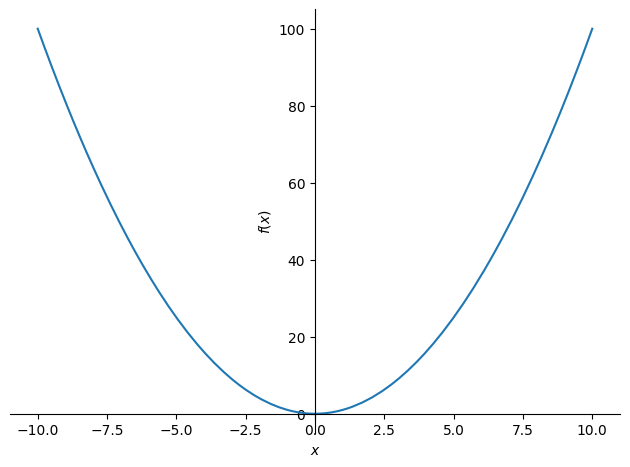

In [57]:
x = sym.symbols('x')
plot(x**2)

Opomba: zadnja vrstica opozori na rezultat v obliki instance `Plot`; izpis objekta `<sympy.plotting.plot.Plot at 0x...>` skrijemo z uporabo podpičja:
```python
plot(x**2);
```
slika pa se vseeno prikaže.

Nekateri pogosti argumenti so:

* `show` prikaže sliko (privzeto `True`),
* `line_color` barva izrisa,
* `xscale` in `yscale` način prikaza (možnosti: `linear` ali `log`),
* `xlim` in `ylim` omejitev prikaza za osi (terka dveh `(min, max)` vrednosti).

Pripravimo dve sliki, kjer bo $y$ os logaritemska in bo razpon izrisa od 1 do 5:

In [58]:
izris1 = plot(x**2, (x, 1, 5), show=False, legend=True, yscale='log')
izris2 = plot(30*sym.log(x), (x, 1, 5), show=False, line_color='C2', legend=True, yscale='log')

Sedaj prvo sliko razširimo z drugo in prikažemo rezultat:

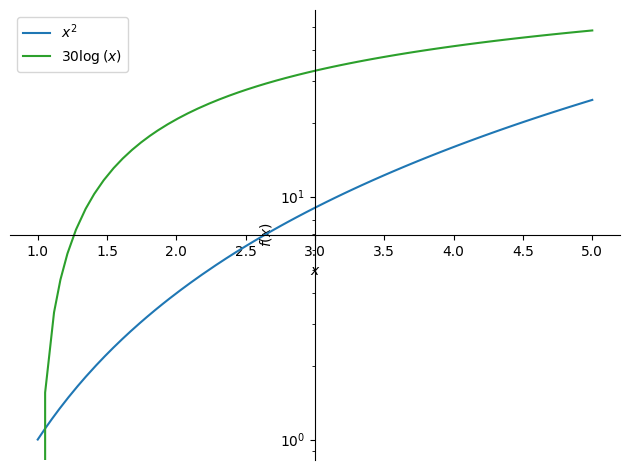

In [59]:
izris1.extend(izris2)
izris1.show()

#### Parametrični izris

Podobno uporabljamo funkcijo `sympy.plotting.plot_parametric` za parametrični izris ([dokumentacija](http://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot_parametric)):
```python
plot_parametric(izraz_x, izraz_y, range, **kwargs)
```
kjer sta nova argumenta:

* `izraz_x` in `izraz_y` definicije lege koordinate $x$ in $y$,
* `**kwargs` je slovar možnosti.

Uvozimo funkcijo:

In [60]:
from sympy.plotting import plot_parametric

Prikažimo uporabo na primeru:

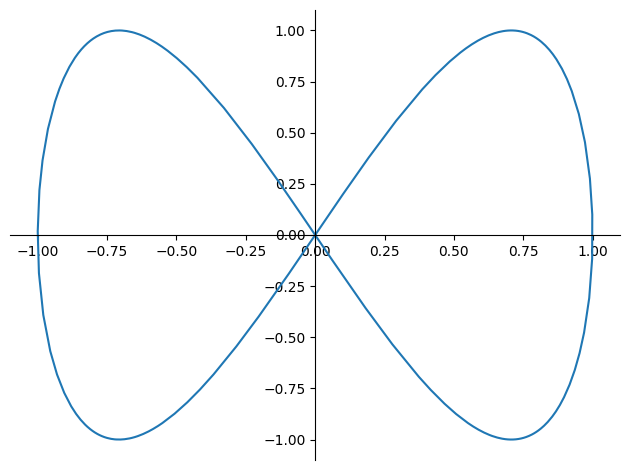

In [61]:
plot_parametric(sym.sin(x), sym.sin(2*x), (x, 0, 2*sym.pi));

#### Izris v prostoru

Funkcija `sympy.plotting.plot3D` ([dokumentacija](http://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot3d)) za izris v prostoru ima sintakso:
```python
plot3d(izraz, razpon_x, razpon_y, **kwargs)
```
kjer so argumenti:

* `izraz` definicija površine,
* `razpon_x` in `razpon_y` razpon koordinate `x` in `y`,
* `**kwargs` slovar možnosti.

Uvozimo funkcijo:

In [62]:
from sympy.plotting import plot3d

Prikažimo uporabo na primeru:

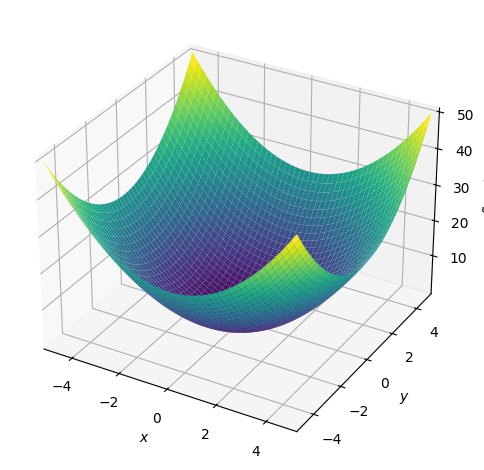

In [63]:
x, y = sym.symbols('x y')
plot3d(x**2 + y**2, (x, -5, 5), (y, -5, 5));

Za ostale prikaze glejte [dokumentacijo](http://docs.sympy.org/latest/modules/plotting.html#module-sympy.plotting.plot).

### Algebra

V tem poglavju si bomo pogledali nekatere osnove uporabe ``SymPy`` za algebrajske operacije.

#### Uporaba ``expand`` in ``factor``

Definirajmo matematični izraz:

In [64]:
x = sym.symbols('x')
f = (x+1)*(x+2)*(x+3)
f

in ga sedaj **razčlenimo** (angl. *expand*, glejte [dokumentacijo](http://docs.sympy.org/latest/tutorial/simplification.html#expand)):

In [65]:
aa = sym.expand(f)
aa

Če želimo pogledati koeficiente pred ``x``, to naredimo z metodo ``coeff()``:

In [66]:
aa.coeff(x)

Argumenti funkcije definirajo, kakšno razširitev želimo ([dokumentacija](http://docs.sympy.org/latest/tutorial/simplification.html#expand)). Če želimo npr. trigonometrično razširitev, potem uporabimo ``trig=True``:

In [67]:
a, b = sym.symbols('a, b')
sym.expand(sym.sin(a+b))

In [68]:
sym.expand(sym.sin(a+b), trig=True)

Obratna operacija od razčlenitve je **razcepitev** ali **razstavljanje** ali **faktorizacija** (angl. *factor*, [dokumentacija](http://docs.sympy.org/latest/tutorial/simplification.html#factor)): 

In [69]:
sym.factor(x**3 + 6 * x**2 + 11*x + 6)

Če nas zanimajo posamezni členi, potem to naredimo s funkcijo `sympy.factor_list`:

In [70]:
sym.factor_list(x**3 + 6 * x**2 + 11*x + 6)

#### Poenostavljanje izrazov s ``simplify``

Funkcija ``sympy.simplify()``  ([dokumentacija](http://docs.sympy.org/latest/tutorial/simplification.html#simplify)) poskuša poenostaviti izraze v bolj preproste (npr. s krajšanjem spremenljivk). 

Za posebne namene lahko poenostavimo tudi z:

* [``sympy.trigsimp``](http://docs.sympy.org/latest/tutorial/simplification.html#trigsimp), 
* [``sympy.powsimp``](http://docs.sympy.org/latest/tutorial/simplification.html#powsimp), 
* [``sympy.logcombine``](http://docs.sympy.org/latest/tutorial/simplification.html#logcombine). 

Za več glejte [dokumentacijo](http://docs.sympy.org/latest/tutorial/simplification.html).

Primeri poenostavljanja:

In [71]:
sym.simplify((x+1)*(x+1)*(x+3))

In [72]:
sym.simplify(sym.sin(a)**2 + sym.cos(a)**2)

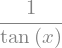

In [73]:
sym.simplify(sym.cos(x)/sym.sin(x))

### Uporaba ``apart`` in ``together``

Funkciji uporabljamo za delo z ulomki:

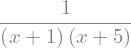

In [74]:
f1 = 1/((1 + x) * (5 + x))
f1

Razcep na parcialne ulomke (angl. *partial fraction decomposition*) izvedemo s funkcijo `sympy.apart()` ([dokumentacija](http://docs.sympy.org/latest/tutorial/simplification.html#apart)):

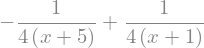

In [75]:
f2 = sym.apart(f1, x)
f2

in potem ponovno v obratni smeri s funkcijo `sympy.together()`:

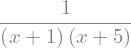

In [76]:
sym.together(f2)

V slednjem primeru pridemo do podobnega rezultata s ``sympy.simplify()``:

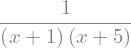

In [77]:
sym.simplify(f2)

### Odvajanje

Odvajanje je načeloma relativno preprosta matematična operacija, ki jo izvedemo s funkcijo ``sympy.diff()`` ([dokumentacija](http://docs.sympy.org/latest/tutorial/calculus.html#derivatives)):

Pripravimo primer:

In [78]:
x, y, z = sym.symbols('x, y, z')
f = sym.sin(x*y) + sym.cos(y*z)
f

Odvajajmo ga po $x$:

In [79]:
sym.diff(f, x)

ali tudi

In [80]:
f.diff(x)

Odvode višjega reda definiramo tako:

In [81]:
sym.diff(f, x, x, x)

ali (isti rezultat malo drugače):

In [82]:
sym.diff(f, x, 3)

Odvod po več spremenljivkah $\frac{d^3f}{dx\,dy^2}$ izvedemo takole:

In [83]:
sym.diff(f, x, 1, y, 2)

### Integriranje

Funkcijo ``integrate`` lahko uporabimo za nedoločeno integriranje ([dokumentacija](http://docs.sympy.org/latest/modules/integrals/integrals.html#module-sympy.integrals)):
```pythoon
integrate(f, x)
```
ali za določeno integriranje:
```python
integrate(f, (x, a, b))
```
kjer so argumenti:

* `f` funkcija, ki jo integriramo,
* `x` spremenljivka, po kateri integriramo,
* `a` in `b` meje integriranja.

Primer nedoločenega integriranja:

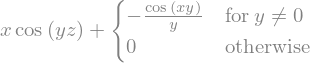

In [84]:
x = sym.symbols('x')
f = sym.sin(x*y) + sym.cos(y*z)
sym.integrate(f, x)

Opazimo, da `sympy` pravilno upošteva možnost, da je $y=0$.

Še primer določenega integriranja:

In [85]:
sym.integrate(f, (x, -1, 1))

Primer, ko so meje v neskončnosti (uporabimo konstanto za neskončnost ``sympy.oo``):

In [86]:
sym.integrate(sym.exp(-x**2), (x, -sym.oo, sym.oo))

### Vsota in produkt vrste

Vsoto vrste definiramo s pomočju funkcije ``sympy.Sum()`` ([dokumentacija](http://docs.sympy.org/latest/modules/concrete.html#sympy.concrete.summations.Sum)):
```python
sympy.Sum(izraz, (spr, start, end))
```
kjer so argumenti:

* `izraz` izraz, katerega seštevamo,
* `spr`, `start` in `end` spremenljivka, ki naračša od `start` do `end` (`end` je vključen).

Primer vsote vrste:

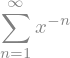

In [87]:
n = sym.Symbol('n')
f = sym.Sum(1/x**n, (n, 1, sym.oo))
f

Šele ko uporabimo metodo `doit_()`, se izračun izvede:

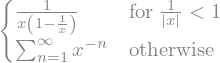

In [88]:
f.doit()

Poglejmo še številčni rezultat:

In [89]:
f.subs({x: 5}).evalf()

Produkt vrste definiramo podobno s funkcijo ``sympy.Product`` ([dokumentacija](http://docs.sympy.org/latest/modules/concrete.html#sympy.concrete.products.Product)):
```python
sympy.Product(izraz, (spr, start, end))
```
kjer so argumenti:

* `izraz` izraz, katerega množimo,
* `spr`, `start` in `end` spremenljivka, ki naračša od `start` do `end` (`end` je vključen).

Primer:

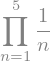

In [90]:
f = sym.Product(1/n, (n, 1, 5))
f

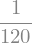

In [91]:
f.doit()

### Limitni račun

Limite računamo s pomočjo funkcije ``sympy.limit()`` ([dokumentacija](http://docs.sympy.org/latest/tutorial/calculus.html#limits)):
```python
sympy.limit(f, x, x0)
```
kjer so argumenti:

* `f` izraz, katerega limito iščemo,
* `x` spremenljivka, ki limitira proti `x0`,
* `x0` limita.

Primer:

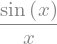

In [92]:
x = sym.symbols('x')
f = sym.sin(x)/x
f

In [93]:
sym.limit(f, x, 0)

Za primer si poglejmo uporabo limite na definiciji odvoda:

$$
\frac{\mathrm{d}f}{\mathrm{d}x} = \lim_{h\rightarrow 0}\frac{f(x+h,y)-f(x,y)}{h}.
$$

Pripravimo funkcijo `f` in njen odvod:

In [94]:
x, y, z, h = sym.symbols('x, y, z, h')
f = sym.sin(x*y) + sym.cos(y*z)

Odvod funkcije je:

In [95]:
sym.diff(f, x)

Enak rezultat izračunamo tudi z uporabo limite:

In [96]:
sym.limit((f.subs(x, x+h) - f)/h, h, 0)

### Taylorjeve vrste

Taylorjeve vrste izračunamo s pomočjo funkcijo ``sympy.series()`` ([dokumentacija](http://docs.sympy.org/latest/modules/series/series.html#id1)):
```python
sympy.series(izraz, x=None, x0=0, n=6, dir='+')
```
kjer so argumenti:

* `izraz` izraz, katerega vrsto določamo,
* `x` neodvisna spremenljivka,
* `x0` vrednost, okoli katere določamo vrsto (privzeto 0),
* `n` red vrste (privzeto 6),
* `dir` smer razvoja vrste (`+` ali `-`).

Primer:

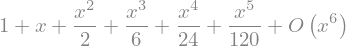

In [97]:
x = sym.symbols('x')
sym.series(sym.exp(x), x) # privzete vrednosti x0=0, in n=6

Če želimo definirati drugo izhodišče (`x0=2`) in z več členi (`n=8`), to izvedemo takole:

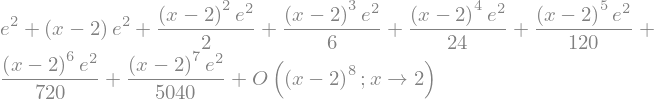

In [98]:
s1 = sym.series(sym.exp(x), x, x0=2, n=8)
s1

Rezultat vključuje tudi red veljavnosti; na ta način lahko kontroliramo veljavnosti izvajanja ($\mathcal{O}$). 

Primer:

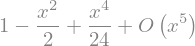

In [99]:
s1 = sym.cos(x).series(x, 0, 5)
s1

In [100]:
s2 = sym.sin(x).series(x, 0, 2)
s2

Izračuna `s1` in `s2` imata različna reda veljavnosti, posledično je produkt:

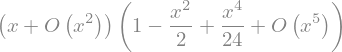

In [101]:
s1 * s2

natančen samo do reda $\mathcal{O}(x^2)$, kar `sympy` ustrezno obravnava:

In [102]:
s3 = sym.simplify(s1 * s2)
s3

Podatek o stopnji veljavnosti lahko odstranimo:

In [103]:
s3.removeO()

### Linearna algebra

#### Matrike in vektorji

Matrike in vektorje definiramo s funkcjo ``Matrix``. Če se pri `numpy.array` ni treba dosledno držati matematičnega zapisa vektorjev in matrik, je pri `sympy` to nujno.

Poglejmo si primer; najprej pripravimo spremenljivke:

In [104]:
m11, m12, m21, m22 = sym.symbols('m11, m12, m21, m22')
b1, b2 = sym.symbols('b1, b2')

Nato matriko in stolpični vektor:

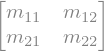

In [105]:
A = sym.Matrix([[m11, m12],[m21, m22]])
A

In [106]:
b = sym.Matrix([[b1], [b2]])
b

Sedaj si poglejmo nekatere tipične operacije; najprej množenje matrike in vektorja:

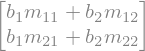

In [107]:
A * b

Nato skalarni produkt dveh vektorjev (paziti moramo na transponiranje enega od vektorjev):

In [108]:
b.T*b

Determinanta in inverzna matrika:

In [109]:
A.det()

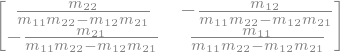

In [110]:
A.inv()

Množenje in potenca matrike:

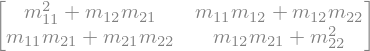

In [111]:
A*A

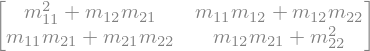

In [112]:
A**2

### Reševanje enačb

Enačbe in sistem enačb rešujemo s funkcijo ``sympy.solve()`` ([dokumentacija](http://docs.sympy.org/latest/modules/solvers/solvers.html#algebraic-equations)). Podprto je reševanje sledečih enačb:

* polinomske enačbe,
* transcendentne enačbe,
* odsekovno definirane enačbe kot kombinacija zgornjih dveh tipov,
* sistem linearnih in polinomskih enačb,
* sistem enačb z neenakostmi.

Sintaksa je:
```python
sympy.solve(f, *symbols, **flags)
```
kjer so argumenti:

* `f` izraz ali seznam izrazov,
* `*symbols` simbol ali seznam simbolov, katere želimo določiti,
* `**flags` slovar možnosti.

Poglejmo primer:

In [113]:
x = sym.symbols('x')
f = sym.sin(x)
en = sym.Eq(f, 1/2)
en

In [114]:
sym.solve(en, x)

Prikažimo rešitev (opazimo, da smo našli samo dve od neskončno rešitev):

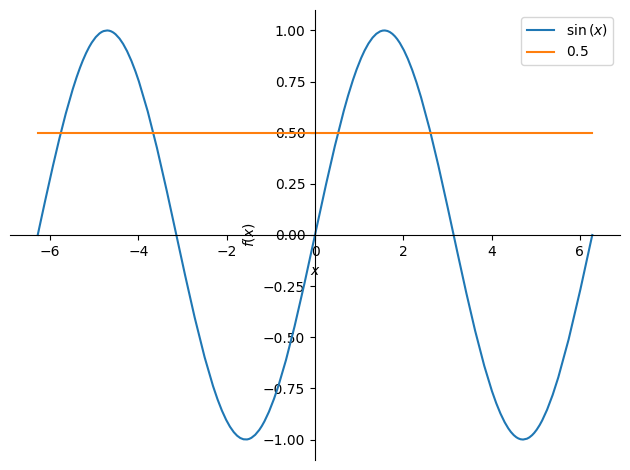

In [115]:
p1 = sym.plotting.plot(sym.sin(x), (x, -2*sym.pi, 2*sym.pi), line_color='C0', show=False, legend=True)
p2 = sym.plotting.plot(0.5, (x, -2*sym.pi, 2*sym.pi), line_color='C1', show=False, legend=True)
p1.extend(p2)
p1.show()

Kvadratna enačba:

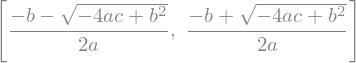

In [116]:
a, b, c, x = sym.symbols('a, b, c, x')
sym.solve(a*x**2 + b*x + c, x)

Sistem enačb:

In [117]:
x, y = sym.symbols('x y')
sym.solve([x + y - 1, x - y - 1], [x, y])

Za nelinearne sisteme pa lahko uporabimo tudi numerično reševanje s funkcijo  `sympy.nsolve()` ([dokumentacija](http://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.nsolve)):
```python
sympy.nsolve(f, [args,] x0, modules=['mpmath'], **kwargs)
```
kjer so argumenti:

* `f` enačba ali sistem enačb, ki ga rešujemo,
* `args` spremenljivke (opcijsko),
* `x0` začetni približek (skalar ali vektor),
* `modules` paket, ki se uporabi za izračun numerične vrednosti (enaka logika kot pri funkciji `lambdify`, privzet je paket `mpmath`),
* `**kwargs` slovar opcij.

Poglejmo primer od zgoraj:

In [118]:
x = sym.symbols('x')
eq = sym.Eq(sym.sin(x), 0.5)
sol = sym.nsolve(en, x, 3)
sol

### Reševanje diferencialnih enačb

#### Nedefinirane funkcije

Preden si ogledamo diferencialne enačbe, moramo spoznati nedefinirane funkcije. Take funkcije definiramo `sympy.Function` [dokumentacija](https://docs.sympy.org/latest/modules/functions/index.html). 

Kot primer si poglejmo kako definiramo enačbo $\ddot x(t)=g$. Najprej definirajmo nedoločeno funkcijo:

In [119]:
x = sym.Function('x')

Nato simbole:

In [120]:
t, g = sym.symbols('t, g')

In še enačbo:

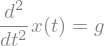

In [121]:
sym.Eq(x(t).diff(t,2), g)

#### Diferencialne enačbe

Diferencialne enačbe in sisteme diferencialnih enačb rešujemo s funkcijo `sympy.dsolve()` ([dokumentacija](http://docs.sympy.org/latest/modules/solvers/ode.html#dsolve)):
```python
sympy.dsolve(eq, func=None, hint='default', simplify=True, 
             ics=None, xi=None, eta=None, x0=0, n=6, **kwargs)
```
kjer so izbrani argumenti:

* `eq` differencialna enačba ali sistem diferencialnih enačb,
* `func` rešitev, ki jo iščemo,
* `ics` začetni in robni pogoji diferencialne enačbe.

Poglejmo si primer mase $m$, ki drsi po površini s koeficientom trenja $\mu$; začetna hitrost je $v_0$, pomik $x_0=0$.

Definirajmo simbole:

In [122]:
x = sym.Function('x')
t, m, mu, g, v0, x0 = sym.symbols('t m mu g v0 x0', real=True, positive=True)

Definirajmo diferencialno enačbo:

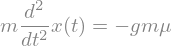

In [123]:
eq = sym.Eq(m*x(t).diff(t,2), -mu*g*m)
eq

Poglejmo lastnosti diferencialne enačbe:

In [124]:
sym.ode_order(eq, x(t))

In [125]:
sym.classify_ode(eq)

('factorable',
 'nth_algebraic',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_euler_eq_nonhomogeneous_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'nth_algebraic_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters_Integral',
 '2nd_nonlinear_autonomous_conserved',
 '2nd_nonlinear_autonomous_conserved_Integral')

Rešimo jo:

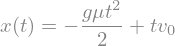

In [126]:
rešitev = sym.dsolve(eq, x(t), 
                     ics={
                         x(0):0,                     #pri času 0s je pomik nič
                         x(t).diff(t).subs(t, 0): v0 #pri času 0s je hitrost enaka v0
                     })
rešitev

Desno stran enačbe prikličemo takole (`rhs` - right-hand side):

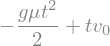

In [127]:
rešitev.rhs

## Nekaj vprašanj za razmislek!

1. Pojasnite na primeru *proceduralno* in *funkcijsko* programiranje.
* Definirajte preprost objekt, naredite nekaj funkcij temu objektu.
* Definirajte objekt, ki pri kreiranju instance zahteva zgolj celoštevilsko vrednost( npr.: dolžino seznama, ki jo bomo uporabili pri naslednji točki).
* Objektu iz prejšnje točke naj pri inicializaciji argumentu ``data`` priredi naključni seznam ustrezne dolžine (glejte funkcijo ``np.random.rand``).
* Objektu iz prejšnje točke dodajte metodo za zapis vrednosti v datoteko s pomočjo funkcije ``np.savetxt``.
* Enako kot pri prejšnji točki, vendar naj se podatki shranijo v binarni obliki s pomočjo modula ``pickle``.
* Dodajte metodo za branje iz datoteke (s pomočjo ``np.genfromtxt``).
* Uvozite ves naslovni prostor iz ``SymPy``. Nastavite lep izpis rezultatov.
* Za trikotnik na sliki definirajte funkcijo za izračun površine in volumna.

<img src="./fig/trikotnik.png" width=300>

* Izračunajte številčne vrednosti (podatki naj bodo definirani v slovarju in si jih izmislite).
* Izračunajte statični moment ploskve $S_{xx}=\int_A y\,dA=\int_{0}^{b} y\,x(y)\,dy$, kjer je $x(y)=a-a\,y/b$.
* Izračunajte vztrajnostni moment ploskve $I_{xx}=\int_A y^2\,dA$, $dA = x(y) \cdot dy$.
* Prikažite $I_{xx}$ v odvisnosti od parametra $b$ ($a$ definirajte poljubno).
* Nedoločeno in določeno (v mejah od 0 do $\tau$) integrirajte izraz: $\sin(5+t)+e^t$.
* Z odvajanjem pokažite pravilnost nedoločenega integrala iz predhodnega koraka.
* Za kotaleči valj (polmer $r$, masa $m$) povežite translatorno $x$ prostost z rotacijsko $\varphi$. Pozneje boste vse izrazili s slednjo. Namig: Dolžina loka kroga ustreza zmnožku polmera $r$ in kota $\varphi$ [rad].
* Določite translatorno kinetično energijo težišča (definirajte s hitrostjo $\dot x$, zaradi predhodne povezave pa bi naj bil rezultat s $\dot{\varphi}$). $E_k = \frac{1}{2} \, m \, v^2$.
* Določite še masni vztrajnostni moment valja in rotacijsko kinetično energijo. Obe kinetični energiji seštejte in izraz poenostavite (če je potrebno). $J_v = \frac{1}{2} \, m \, r^2$ $E_{k, r} = \frac{1}{2} \, J_v \, \left[\frac{d}{dt} \varphi(t)\right]^2$
* Če na valj deluje moment $-M$, definirajte mehansko energijo: $E_m=-M\,\varphi$ in določite gibalno enačbo iz spremembe mehanske energije: $\frac{d E_m}{d t}=\frac{d E_k}{d t}$.
* Nadaljujete na predhodni enačbi: poiščite ``sympy`` funkcijo ``replace`` in ugotovite razliko s ``subs``. Poskusite s pomočjo ``replace`` $\dot{\varphi}$ na obeh straneh enačbe spremeniti v 1.
* Najdite rešitev za predhodno pridobljeno diferencialno enačbo.
* Izmislite si začetne pogoje in jih uporabite na predhodno rešeni diferencialni enačbi. Izmislite si še preostale podatke ter prikažite rezultat.
* Določite čas, ko je zasuk $\varphi$ spet enak začetnemu (če ste predpostavili začetni zasuk nič, potem torej iščete $\varphi=0$. Določite tudi čas, ko je kotna hitrost $\dot{\varphi}$ enaka nič.

## Dodatno

###  sympy.mechanics
``sympy`` ima vgrajeno podporo za klasično mehaniko ([dokumentacija](http://docs.sympy.org/latest/modules/physics/mechanics/index.html#classical-mechanics)). Celovit tutorial je bil prikazan na znanstveni konferenci [SciPy 2016](https://www.youtube.com/watch?v=r4piIKV4sDw).
